# 新冠状病毒传播数据分析

## 1. 疫情初步分析，筛选相关性强的特征

通过官方公布的日频疫情数据、各地区（全国各省、直辖市、港澳台，去掉疫情严重的湖北和武汉）的历史天气、人口、GDP、距离武汉公里数等数据，筛选和确诊人数相关性强的特征。

所有数据都有各省、直辖市、港澳台、以及武汉，省的天气数据统计的是所在省会城市的数据。

### 1.1. 现有特征数据展示

In [1]:
# 日频数据的最后一天
last_date = '2020-01-30'

In [2]:
from coronavirus_analyzer import CoronavirusAnalyzer
# 初始化分析类
analyzer = CoronavirusAnalyzer(last_date)

2020-01-31 12:41:45,205 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.
2020-01-31 12:41:45,402 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-01-30），如下这些地区没有新增的确诊人数：吉林、台湾、青海、澳门、西藏，如下这些地区没有任何疫情数据变化：台湾、青海、澳门、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


In [3]:
# 地区相互距离矩阵
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 8)
print(analyzer.df_distance.index.tolist())
analyzer.df_distance

['北京', '上海', '天津', '重庆', '黑龙江', '吉林', '辽宁', '内蒙古', '河北', '山西', '山东', '河南', '陕西', '甘肃', '宁夏', '青海', '新疆', '安徽', '江苏', '浙江', '湖南', '江西', '湖北', '四川', '贵州', '福建', '台湾', '广东', '海南', '广西', '云南', '西藏', '香港', '澳门', '武汉']


,北京,上海,天津,重庆,...,西藏,香港,澳门,武汉
北京,0.000000,1063.211982,103.589069,1464.353444,...,2566.591142,1963.500780,1979.971010,1047.708830
上海,1063.211982,0.000000,961.335849,1448.054847,...,2907.958210,1227.709844,1272.272492,685.093039
...,...,...,...,...,...,...,...,...,...
澳门,1979.971010,1272.272492,1908.890967,1072.535924,...,2384.032442,64.228639,0.000000,934.088338
武汉,1047.708830,685.093039,981.317616,762.974248,...,2232.235661,921.636262,934.088338,0.000000


In [4]:
# 地区信息
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 12)
analyzer.df_region

,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
地区,,,,,,,,,,,
全国,1.395380e+09,9.003000e+13,64520.059052,54776300.0,0.0000,964.998822,NaN,NaN,NaN,NaN,NaN
广东,1.134600e+08,9.727777e+12,85737.502203,590000.0,0.0052,17.970000,1583.818086,6.6,23.133333,113.250000,836.326981
...,...,...,...,...,...,...,...,...,...,...,...
西藏,3.371500e+06,1.477630e+11,43827.079935,0.0,0.0000,122.840000,364348.212962,3658.0,29.666667,91.166667,2232.235661
澳门,6.320000e+05,3.609000e+11,571044.303797,0.0,0.0000,0.002540,40.189873,19.0,22.216667,113.550000,934.088338


In [5]:
# 历史天气文字转数值
from weather_crawler import WeatherCrawler
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

weather_crawler = WeatherCrawler()
weather_crawler.weather_info

,晴,多云,阴,雾,大雾,霾,中度霾,重度霾,阵雨,小雨,小到中雨,中雨,中到大雨,大雨,雨夹雪,阵雪,小雪,小到中雪,中雪,中到大雪,大雪
晴朗度,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
雾度,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
霾度,0,0,0,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0
降雨量,0,0,0,0,0,0,0,0,1,2,3,4,5,6,3,0,0,0,0,0,0
降雪量,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,4,5,6


In [6]:
# 历史天气（包括所有原始数据和天气文字转数值的数据，目前没有使用风向）
import pandas as pd
pd.set_option('display.max_columns', 40)
analyzer.df_weather.tail(2)

武汉                                                            \
           上午天气 下午天气 上午温度 下午温度   风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                          
2020-01-28    晴    晴    8   -1  西北风    1    2     3    0    0     0     0   
2020-01-29    晴    晴   12   -1   西风    1    2     3    0    0     0     0   

                                         上海            ...   湖南              \
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量 上午天气 下午天气 上午温度  ... 下午霾度 下午降雨量 下午降雪量   
日期                                                     ...                    
2020-01-28     3    0    0     0     0    阴    晴    7  ...    0     0     0   
2020-01-29     3    0    0     0     0   多云    晴    8  ...    0     0     0   

             香港                                                              \
           上午天气 下午天气 上午温度 下午温度     风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                            
2020-01-28   小雨   多云   16   11  无持续风向    1    2     0    0    0     2     0   
2020-01-29   多云   多云   17   11  无持续风向    1    2     2    0    0     0     0   

                                        
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量  
日期                                      
2020-01-28     2    0    0     0     0  
2020-01-29     2    0    0     0     0  

[2 rows x 595 columns]

In [7]:
# 历史天气平均数据
analyzer.df_weather_average.head()

/Users/hqs/github/coronavirus-analysis/weather_crawler.py:218: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_all = pd.concat([df_virus_daily, df_weather], axis=1)


,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,...,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量
地区,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
上海,14.619048,14.985782,5.285714,5.658768,7.309524,7.492891,5.285714,4.848341,3.142857,2.924171,2.642857,2.424171,1.238095,1.109005,0.666667,0.592417,0.619048,0.554502,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.761905,3.061611,1.238095,1.317536,1.380952,1.530806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
云南,20.700000,20.094737,3.000000,2.768421,10.350000,10.047368,6.700000,6.905263,3.850000,3.952632,3.350000,3.452632,5.250000,4.910526,2.600000,2.410526,2.625000,2.455263,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450000,0.678947,0.300000,0.457895,0.225000,0.339474,0.450000,0.678947,0.300000,0.457895,0.225000,0.339474
内蒙古,-20.000000,-18.298013,-15.277778,-14.503311,-10.000000,-9.149007,4.333333,4.139073,2.666667,2.569536,2.166667,2.069536,4.888889,5.231788,2.500000,2.629139,2.444444,2.615894,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.225166,0.111111,0.092715,0.166667,0.112583
北京,-1.904762,-1.445498,-5.857143,-5.767773,-0.952381,-0.722749,3.571429,3.473934,2.285714,2.236967,1.785714,1.736967,5.000000,5.009479,2.523810,2.516588,2.500000,2.504739,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
台湾,34.333333,34.289100,15.428571,15.630332,17.166667,17.144550,7.095238,6.582938,4.047619,3.791469,3.547619,3.291469,2.095238,2.132701,1.142857,1.165877,1.047619,1.066351,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.619048,1.545024,0.857143,0.843602,0.809524,0.772512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 1.2. 疫情数据展示

疫情数据主要有 3 个：
1. 实时累计数据；疫情数据实时从网上爬取，一分钟一次，如果有任何数据变化，都会新增一行；
2. 日频累计数据：对实时累计数据进行处理，每日各地确诊人数有变化的第一条数据，作为前一天的日频累计数据（注意，不是当天的，因为实际很有可能是各地政府统计的到当天 0 点为止的数据）；
3. 日频增量数据：对日频累计数据进行处理，为每日日频值减去前一天日频值。

其他疫情数据的说明：
1. 疑似数据，目前只有自 2020-01-27 23:33 起的全国每日总量的公布，各地疑似人数公布极少；
2. 是否更新列，用于转换成日频数据用，为每天确诊人数变化的第一条，全国为每天疑似人数变化的第一条。

In [8]:
# 实时累计疫情数据
analyzer.df_virus.tail(2)

全国                          武汉                     湖北       \
                 是否更新   死亡   治愈     疑似    确诊 是否更新   死亡  治愈 疑似    确诊 是否更新   死亡   
2020-01-31 12:18    0  213  176  15238  9705    0  159  75  0  2639    0  204   
           12:28    0  213  176  15238  9716    0  159  75  0  2639    0  204   

                                 浙江                ...   台湾               青海  \
                   治愈 疑似    确诊 是否更新 死亡 治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似 确诊 是否更新   
2020-01-31 12:18  116  0  5806    0  0  9  0  537  ...    0  0  0  0  9    0   
           12:28  116  0  5806    0  0  9  0  537  ...    0  0  0  0  9    0   

                               澳门               西藏              
                 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-01-31 12:18  0  0  0  8    0  0  0  0  7    0  0  0  0  1  
           12:28  0  0  0  8    0  0  0  0  7    0  0  0  0  1  

[2 rows x 180 columns]

In [9]:
# 日频累计疫情数据（取各地区每日第一条更新的数据，作为前一天的日频数据）
analyzer.df_virus_daily.tail(2)

全国                             武汉                        湖北  \
               死亡     治愈       疑似      确诊     死亡    治愈   疑似      确诊     死亡   
2020-01-29  171.0  135.0  12167.0  8149.0  129.0  55.0  0.0  2261.0  162.0   
2020-01-30  213.0  176.0  15238.0  9716.0  159.0  75.0  0.0  2639.0  204.0   

                                浙江                    广东                    \
              治愈   疑似      确诊   死亡   治愈   疑似     确诊   死亡    治愈   疑似     确诊   
2020-01-29  90.0  0.0  4586.0  0.0  4.0  0.0  428.0  0.0   5.0  0.0  311.0   
2020-01-30  86.0  0.0  5806.0  0.0  9.0  0.0  537.0  0.0  10.0  0.0  393.0   

            ...   香港                   台湾                  青海                 \
            ...   死亡   治愈   疑似    确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   
2020-01-29  ...  0.0  0.0  0.0  10.0  0.0  0.0  0.0  9.0  0.0  0.0  0.0  8.0   
2020-01-30  ...  0.0  0.0  0.0  12.0  0.0  0.0  0.0  9.0  0.0  0.0  0.0  8.0   

             澳门                  西藏                 
             死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊  
2020-01-29  0.0  0.0  0.0  7.0  0.0  0.0  0.0  1.0  
2020-01-30  0.0  0.0  0.0  7.0  0.0  0.0  0.0  1.0  

[2 rows x 144 columns]

In [10]:
# 日频增量疫情数据（每日第一条更新的累计数据和上一日第一条更新的累计数据差）
analyzer.df_virus_daily_inc.tail(2)

全国                          武汉                      湖北        \
              死亡    治愈      疑似      确诊    死亡    治愈   疑似     确诊    死亡    治愈   
2020-01-29  38.0  16.0  2928.0  2054.0  25.0   8.0  0.0  356.0  37.0  10.0   
2020-01-30  42.0  41.0  3071.0  1567.0  30.0  20.0  0.0  378.0  42.0  -4.0   

                          浙江                    广东                  ...   香港  \
             疑似      确诊   死亡   治愈   疑似     确诊   死亡   治愈   疑似    确诊  ...   死亡   
2020-01-29  0.0  1032.0  0.0  1.0  0.0  132.0  0.0  0.0  0.0  70.0  ...  0.0   
2020-01-30  0.0  1220.0  0.0  5.0  0.0  109.0  0.0  5.0  0.0  82.0  ...  0.0   

                            台湾                  青海                  澳门       \
             治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   
2020-01-29  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0   
2020-01-30  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       西藏                 
             疑似   确诊   死亡   治愈   疑似   确诊  
2020-01-29  0.0  0.0  0.0  0.0 -1.0  1.0  
2020-01-30  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 144 columns]

### 1.3. 将各地确诊人数作为目标值，作为特征筛选的依据

In [11]:
# 取最新一条实时累计疫情数据，作为特征筛选的依据
recent_virus = analyzer.df_virus.iloc[-1]
pd.DataFrame(recent_virus).T

全国                          武汉                     湖北       \
                 是否更新   死亡   治愈     疑似    确诊 是否更新   死亡  治愈 疑似    确诊 是否更新   死亡   
2020-01-31 12:28    0  213  176  15238  9716    0  159  75  0  2639    0  204   

                                 浙江                ...   台湾               青海  \
                   治愈 疑似    确诊 是否更新 死亡 治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似 确诊 是否更新   
2020-01-31 12:28  116  0  5806    0  0  9  0  537  ...    0  0  0  0  9    0   

                               澳门               西藏              
                 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-01-31 12:28  0  0  0  8    0  0  0  0  7    0  0  0  0  1  

[1 rows x 180 columns]

In [12]:
import pandas as pd
# 取最新一条实时累计疫情数据中的确诊人数
index = [_[0] for _ in recent_virus.index[::5]]
s_virus = pd.Series(recent_virus.values[4::5], index=index)
s_virus.name = '确诊'
pd.DataFrame(s_virus).T

,全国,武汉,湖北,浙江,广东,河南,湖南,江西,安徽,重庆,山东,四川,江苏,北京,上海,福建,广西,陕西,河北,云南,黑龙江,海南,辽宁,山西,天津,甘肃,宁夏,内蒙古,新疆,贵州,吉林,香港,台湾,青海,澳门,西藏
确诊,9716,2639,5806,537,393,352,332,240,237,206,178,177,168,132,128,120,87,87,82,76,59,50,45,39,32,29,21,20,17,15,14,12,9,8,7,1


### 1.4. 构造、合并特征数据和分析目标

去掉湖北、武汉数据，避免对分析造成影响

In [13]:
# 合并地区信息、疫情 DataFrame
df = pd.concat([analyzer.df_region, s_virus], axis=1, sort=False)
# 去掉全国、以及疫情严重的湖北、武汉，增加确诊人口占比列
index = df.index.tolist()
index.remove('全国')
df = df.loc[index]
# 再合并入天气平均数据
df = pd.concat([analyzer.df_weather_average, df], axis=1, sort=False)
df['确诊'].fillna(0, inplace=True)
# 去掉疫情严重的湖北、武汉
index = df.index.tolist()
index.remove('湖北')
index.remove('武汉')
df = df.loc[index]

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 100)
df

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,14.619048,14.985782,5.285714,5.658768,7.309524,7.492891,5.285714,4.848341,3.142857,2.924171,2.642857,2.424171,1.238095,1.109005,0.666667,0.592417,0.619048,0.554502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.761905,3.061611,1.238095,1.317536,1.380952,1.530806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24237800.0,3.267987e+12,134830.182607,9726900.0,0.401311,0.63,259.924581,4.5,31.233333,121.483333,685.093039,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-33.947368,-33.158824,-23.263158,-23.023529,-16.973684,-16.579412,3.526316,3.858824,2.263158,2.429412,1.763158,1.929412,4.736842,4.611765,2.473684,2.476471,2.368421,2.305882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315789,0.405882,0.105263,0.117647,0.157895,0.202941,37887000.0,1.636162e+12,43185.314224,500000.0,0.013197,45.48,12004.117507,171.7,45.750000,126.683333,1992.035603,59


### 1.5. 归一化数据

避免特征值本身大小影响分析

In [14]:
# 正态分布归一化数据
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
arr = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(arr, index=df.index, columns=df.columns)
df_standard

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,0.409107,0.416265,0.542661,0.566724,0.409107,0.416265,1.047784,0.631669,1.047784,0.631669,1.047784,0.631669,-1.549659,-1.522970,-1.508903,-1.504067,-1.549659,-1.522970,-0.305269,-0.318808,-0.268631,-0.237921,-0.305269,-0.318808,-0.24457,-0.248957,-0.24457,-0.246085,-0.24457,-0.248957,1.880646,1.860677,1.645032,1.520425,1.880646,1.860677,-0.712744,-0.690865,-0.635158,-0.634133,-0.712744,-0.690865,-0.586047,0.178044,0.432847,3.711245,3.496561,-0.740493,-0.328960,-0.614836,-0.182266,1.064326,-0.618744,0.073688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-2.180227,-2.229180,-2.191850,-2.234434,-2.180227,-2.229180,-0.581048,-0.290975,-0.581048,-0.290975,-0.581048,-0.290975,1.200429,1.091259,1.307270,1.308821,1.200429,1.091259,-0.305269,-0.318808,-0.268631,-0.237921,-0.305269,-0.318808,-0.24457,-0.248957,-0.24457,-0.246085,-0.24457,-0.248957,-0.904418,-0.904768,-0.896496,-0.902882,-0.904418,-0.904768,0.271676,0.581915,0.102717,0.112889,0.271676,0.581915,-0.119861,-0.524437,-0.478386,-0.488334,-0.381332,0.443544,-0.148337,-0.408308,1.881907,1.665539,1.800286,-0.460667


### 1.6. 计算特征和目标的相关性

In [15]:
# 计算各种因子和“确诊”的相关性
corr = df_standard.corr().iloc[-1:, :-1]
corr

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
确诊,0.229545,0.235395,0.264035,0.272961,0.229545,0.235395,0.196584,0.221558,0.196584,0.221558,0.196584,0.221558,-0.493392,-0.495014,-0.477304,-0.480449,-0.493392,-0.495014,-0.187064,-0.195084,-0.156568,-0.149602,-0.187064,-0.195084,-0.135039,-0.136742,-0.135039,-0.134783,-0.135039,-0.136742,0.554011,0.56126,0.567316,0.58437,0.554011,0.56126,0.049752,0.004075,0.027147,-0.032294,0.049752,0.004075,0.692955,0.657133,-0.154326,0.160311,-0.018955,-0.263689,-0.253464,-0.382083,-0.209245,0.239467,-0.557468


In [16]:
# 各特征与确诊人数的相关性
corr_injured = corr.loc['确诊']
corr_injured

pd.set_option('display.max_columns', 100)
sorted_index = corr_injured.abs().sort_values(ascending=False).index
selected_factor_set = set()
selected_factors = []
for idx in sorted_index:
    if idx.startswith('加权') or idx.startswith('人均'):
        idx_in_set = idx[2:]
    elif idx.endswith('占比'):
        idx_in_set = idx[:-2]
    else:
        idx_in_set = idx
    if idx_in_set not in selected_factor_set:
        selected_factor_set.add(idx_in_set)
        selected_factors.append(idx)
corr_injured_sum = corr_injured[selected_factors].abs().sum()
selected_target = '确诊'
print('与“{}”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：{}。'.format(selected_target, selected_factors))
pd.DataFrame([corr_injured])[sorted_index]

与“确诊”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：['人口', 'GDP', '加权平均下午降雨量', '加权平均上午降雨量', '加权平均日均降雨量', '距离武汉', '加权平均上午晴朗度', '加权平均日均晴朗度', '加权平均下午晴朗度', '海拔', '加权平均下午温度', '面积', '东经', '加权平均日均温度', '加权平均上午温度', '加权平均最低风速', '加权平均日均风速', '加权平均最高风速', '北纬', '加权平均日均雾度', '加权平均上午雾度', '流动人口', '平均下午雾度', '加权平均日均霾度', '加权平均上午霾度', '平均下午霾度', '平均日均降雪量', '平均上午降雪量', '加权平均下午降雪量']。


,人口,GDP,加权平均下午降雨量,平均下午降雨量,加权平均上午降雨量,加权平均日均降雨量,距离武汉,平均上午降雨量,平均日均降雨量,加权平均上午晴朗度,加权平均日均晴朗度,平均日均晴朗度,平均上午晴朗度,加权平均下午晴朗度,平均下午晴朗度,海拔,加权平均下午温度,平均下午温度,面积,人均面积,东经,加权平均日均温度,加权平均上午温度,平均日均温度,平均上午温度,加权平均最低风速,加权平均日均风速,加权平均最高风速,北纬,平均最高风速,平均最低风速,平均日均风速,加权平均日均雾度,加权平均上午雾度,平均日均雾度,平均上午雾度,流动人口,平均下午雾度,人均GDP,加权平均下午雾度,加权平均日均霾度,加权平均上午霾度,平均日均霾度,平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均降雪量,平均上午降雪量,加权平均下午降雪量,平均下午降雪量,流动人口占比,加权平均日均降雪量,加权平均上午降雪量
确诊,0.692955,0.657133,0.58437,0.567316,0.56126,0.56126,-0.557468,0.554011,0.554011,-0.495014,-0.495014,-0.493392,-0.493392,-0.480449,-0.477304,-0.382083,0.272961,0.264035,-0.263689,-0.253464,0.239467,0.235395,0.235395,0.229545,0.229545,0.221558,0.221558,0.221558,-0.209245,0.196584,0.196584,0.196584,-0.195084,-0.195084,-0.187064,-0.187064,0.160311,-0.156568,-0.154326,-0.149602,-0.136742,-0.136742,-0.135039,-0.135039,-0.135039,-0.134783,0.049752,0.049752,-0.032294,0.027147,-0.018955,0.004075,0.004075


### 1.7. 对选定的特征数据之间的相关性进行分析，进一步筛选特征数据

先查看特征之间的相关性。

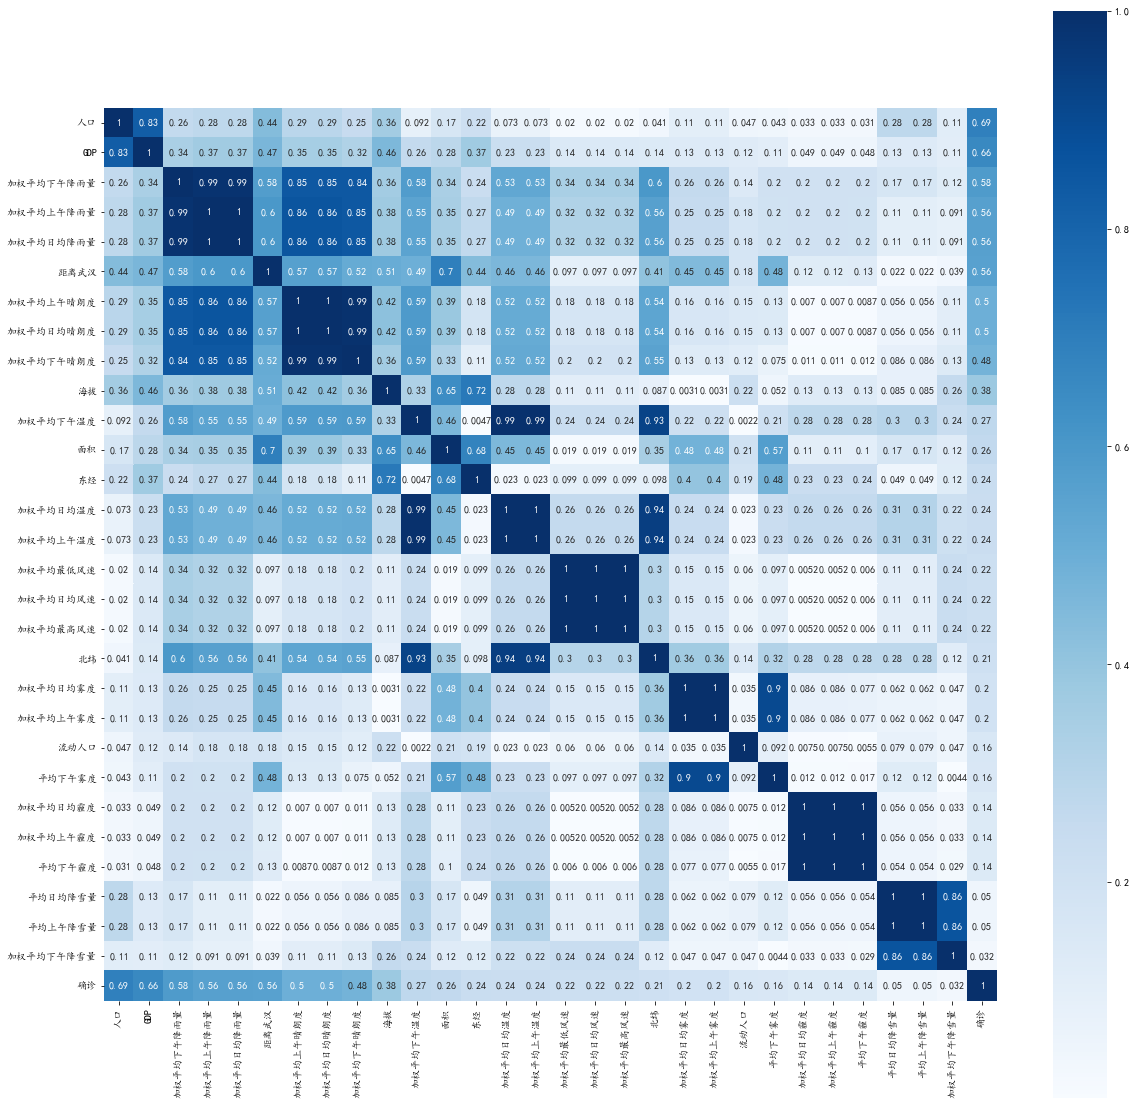

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df_region_info_weather = df_standard[selected_factors + [selected_target]]
df_corr = df_region_info_weather.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

如上图，将相互强相关的特征数据，取其中一个：对“上午”、“下午”、“最高”、“最低”、“日均”取“日均”。如下图。

再次筛选后的特征和目标：人口、GDP、加权平均日均降雨量、距离武汉、加权平均日均晴朗度、海拔、面积、东经、加权平均日均温度、加权平均日均风速、北纬、加权平均日均雾度、流动人口、加权平均日均霾度、平均日均降雪量、确诊


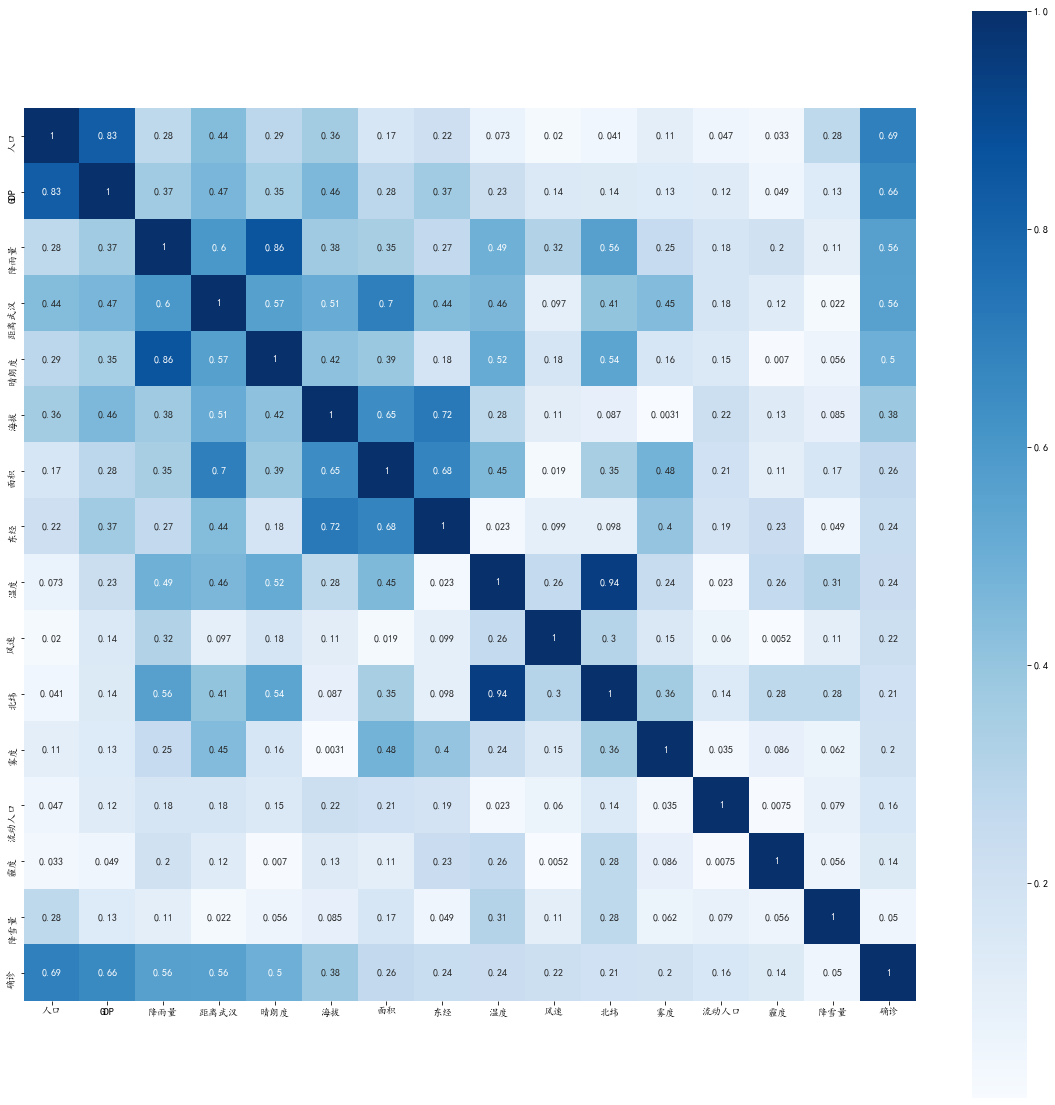

In [18]:
selected_cols = []
selected_col_short_names = []  # 后续对特征使用缩写的名称
for col in df_region_info_weather.columns:
    if '平均' in col:
        name = col.replace('加权', '').replace('上午', '').replace('下午', '').replace('最高', '')\
               .replace('最低', '').replace('日均', '')
        if '日均' in col:
            selected_cols.append(col)
            selected_col_short_names.append(name.replace('平均', ''))
    else:
        selected_cols.append(col)
        selected_col_short_names.append(col)
print('再次筛选后的特征和目标：{}'.format('、'.join(selected_cols)))
df_selected = df_region_info_weather[selected_cols]
df_selected.columns = selected_col_short_names
df_corr = df_selected.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

In [19]:
df_corr.iloc[-1:, :-1]

,人口,GDP,降雨量,距离武汉,晴朗度,海拔,面积,东经,温度,风速,北纬,雾度,流动人口,霾度,降雪量
确诊,0.692955,0.657133,0.56126,-0.557468,-0.495014,-0.382083,-0.263689,0.239467,0.235395,0.221558,-0.209245,-0.195084,0.160311,-0.136742,0.049752


### 1.8. 相关性分析结论

In [20]:
corr_analysis = df_corr.iloc[-1:, :-1].T
corr_analysis.columns = ['和确诊的相关性（绝对值越大表示越相关）']
corr_info_dict = {
    '人口': ('人口越多的地区，被确诊的人数越多', '人口越少的地区，被确诊的人数越多'),
    'GDP': ('GDP 越高的地区，被确诊的人数越多', 'GDP 越低的地区，被确诊的人数越多'),
    '距离武汉': ('离武汉越远，被确诊的人数越多', '离武汉越近，被确诊的人数越多'),
    '降雨量': ('降雨量越多的地区，被确诊的人数越多', '降雨量越少的地区，被确诊的人数越多'),
    '晴朗度': ('天越晴的地区，被确诊的人数越多', '天越阴的地区，被确诊的人数越多'),
    '海拔': ('海拔越高的地区，被确诊的人数越多', '海拔越低的地区，被确诊的人数越多'),
    '面积': ('面积越大的地区，被确诊的人数越多', '面积越小的地区，被确诊的人数越多'),
    '温度': ('温度越高的地区，被确诊的人数越多', '温度越低的地区，被确诊的人数越多'),
    '流动人口': ('流动人口越高的地区，被确诊的人数越多', '流动人口越低的地区，被确诊的人数越多'),
    '东经': ('越东方的地区，被确诊的人数越多', '越北方的地区，被确诊的人数越多'),
    '北纬': ('越北方的地区，被确诊的人数越多', '越南方的地区，被确诊的人数越多'),
    '雾度': ('雾越多的地区，被确诊的人数越多', '雾越少的地区，被确诊的人数越多'),
    '霾度': ('霾越多的地区，被确诊的人数越多', '霾越少的地区，被确诊的人数越多'),
    '降雪量': ('降雪量越多的地区，被确诊的人数越多', '降雪量越少的地区，被确诊的人数越多'),
    '风速': ('风速越高的地区，被确诊的人数越多', '风速越低的地区，被确诊的人数越多'),
}
desc = []
for name, val in zip(corr_analysis.index, corr_analysis.values.reshape(-1)):
    if abs(val) > 0.1:
        if val > 0:
            desc.append(corr_info_dict[name][0])
        else:
            desc.append(corr_info_dict[name][1])
    else:
        desc.append('该因素几乎没有影响')
corr_analysis['新冠状病毒影响因素分析（影响力从高到低排序）'] = desc
pd.set_option('display.max_rows', 30)
corr_analysis

,和确诊的相关性（绝对值越大表示越相关）,新冠状病毒影响因素分析（影响力从高到低排序）
人口,0.692955,人口越多的地区，被确诊的人数越多
GDP,0.657133,GDP 越高的地区，被确诊的人数越多
降雨量,0.561260,降雨量越多的地区，被确诊的人数越多
距离武汉,-0.557468,离武汉越近，被确诊的人数越多
晴朗度,-0.495014,天越阴的地区，被确诊的人数越多
海拔,-0.382083,海拔越低的地区，被确诊的人数越多
面积,-0.263689,面积越小的地区，被确诊的人数越多
东经,0.239467,越东方的地区，被确诊的人数越多
温度,0.235395,温度越高的地区，被确诊的人数越多
风速,0.221558,风速越高的地区，被确诊的人数越多


**从天气数据看，<font color=red>晴天</font>相对安全一些。**

## 2. 疫情趋势分析

### 2.1. 查看各地每日新增确诊人数趋势图

In [21]:
from coronavirus_analyzer import CoronavirusAnalyzer
from util.util import Util
import pandas as pd
import datetime

# FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. 
# The converter was registered by pandas on import. Future versions of pandas will require you to 
# explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 初始化分析类
analyzer = CoronavirusAnalyzer(last_date)

df_virus_daily_inc = analyzer.df_virus_daily_inc

regions = df_virus_daily_inc.columns.levels[0][df_virus_daily_inc.columns.codes[0][::4]]
df_virus_daily_inc_injured = analyzer.get_injured(df_virus_daily_inc)

2020-01-31 12:42:06,985 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-01-30），如下这些地区没有新增的确诊人数：吉林、台湾、青海、澳门、西藏，如下这些地区没有任何疫情数据变化：台湾、青海、澳门、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


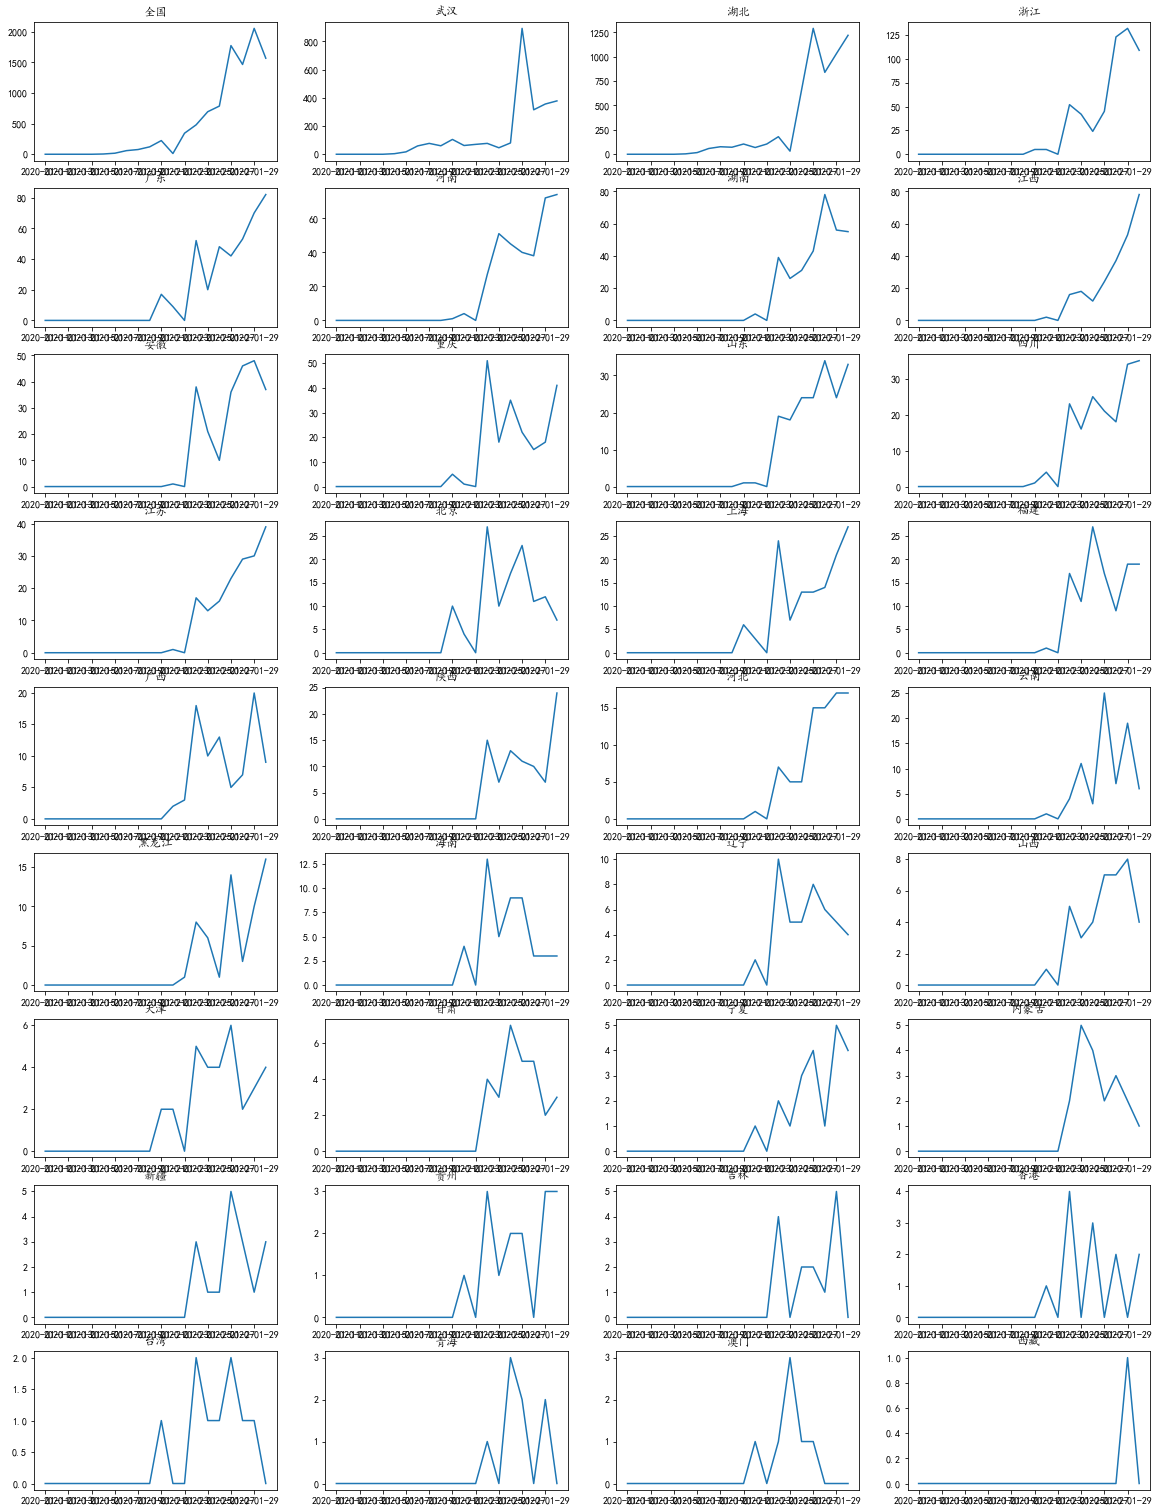

In [22]:
from util.util import Util
import matplotlib.pyplot as plt

analyzer.subplots(analyzer.df_virus_daily_inc_injured)

### 2.2. 分类
通过上面的图，可以看到一些相似趋势形状的图形，尝试用 max min 归一化，进行分类；但当前累计确诊人数全国各地差异较大，需要区别对待。

#### 2.2.1. 对各地当前累计确诊人数分类
将湖北、武汉区别出来，其他地区当前累计确诊人数用 k-means 分类

In [23]:
n_clusters = 5

df_recent_daily_injured = analyzer.df_recent_daily_injured
omitted_regions = ['全国', '武汉']
for region in omitted_regions:
    del df_recent_daily_injured[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(
    df_recent_daily_injured, n_clusters=n_clusters, insure_sorted=True)
print('除了{}，累计确诊人数从高到低分 {} 类：'.format('、'.join(omitted_regions), n_clusters))
clusters_by_cum = {}
cum_desc = {0: '特多', 1: '多', 2: '中', 3: '少', 4: '极少'}
for i, _ in enumerate(zip(cluster_centers.tolist(), regions_by_cluster, cum_desc.values())):
    center, cluster, desc = _
    clusters_by_cum[i] = cluster
    print('{}：簇 id：{}，簇中心：{}，分类：{}'.format(desc, i, center[0], cluster))

除了全国、武汉，累计确诊人数从高到低分 5 类：
特多：簇 id：0，簇中心：5806.0，分类：['湖北']
多：簇 id：1，簇中心：537.0，分类：['浙江']
中：簇 id：2，簇中心：359.0，分类：['广东' '河南' '湖南']
少：簇 id：3，簇中心：175.0，分类：['江西' '安徽' '重庆' '山东' '四川' '江苏' '北京' '上海' '福建']
极少：簇 id：4，簇中心：35.39999999999992，分类：['广西' '陕西' '河北' '云南' '黑龙江' '海南' '辽宁' '山西' '天津' '甘肃' '宁夏' '内蒙古' '新疆' '贵州'
 '吉林' '香港' '台湾' '青海' '澳门' '西藏']


#### 2.2.2. 对各地每日新增确诊人数的 3 日均线走势图进行分类

先对数据作 3 日均线处理，以减少单日波动（比如有时候单日疑似数量非常多，但新增很少，到后面一天则相反）

In [24]:
# 均匀分布归一化数据，并用 k-means 分类
from sklearn import preprocessing
import pandas as pd

# 每天分类可能不同，需要做相应的调整，调整。方法是，先用 0,1,2...,n （n+1为簇总数）的顺序，执行程序并画图。
# 如果分类出来的簇中心的趋势严重性不是从高到低，则调整顺序。
_inc_desc = (
    (1, '新增趋势陡然向上'), 
    (0, '新增趋势缓缓向上'), 
    (2, '新增趋势略有降低'), 
    (3, '新增趋势明显降低'), 
)

inc_desc = {}
order = []
for i, _ in enumerate(_inc_desc):
    c_id, desc = _
    inc_desc[i] = desc
    order.append(c_id)
n_clusters = len(inc_desc)

# 3日新增确诊人数均值
df_ma3 = analyzer.moving_avg(analyzer.df_virus_daily_inc_injured, window_size=3)

min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(df_ma3)
df_min_max = pd.DataFrame(X_min_max, index=df_ma3.index, columns=df_ma3.columns)
for region in omitted_regions:
    del df_min_max[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(
    df_min_max, n_clusters=n_clusters, max_iter=300, n_jobs=4, try_times=1000, order=order)
print('各数据离簇中心距离和：{}'.format(clf.inertia_))

各数据离簇中心距离和：4.396858799656737


簇 id：0，新增趋势陡然向上，['簇中心 1', '浙江', '江西', '西藏']


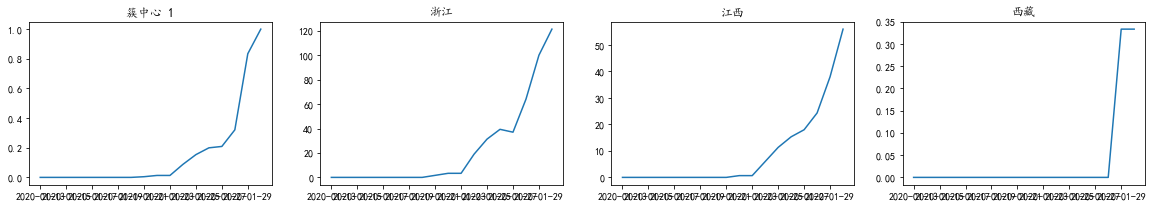

簇 id：1，新增趋势缓缓向上，['簇中心 2', '湖北', '广东', '河南', '湖南', '安徽', '山东', '四川', '江苏', '上海', '河北', '云南', '黑龙江', '山西', '宁夏', '新疆', '吉林']


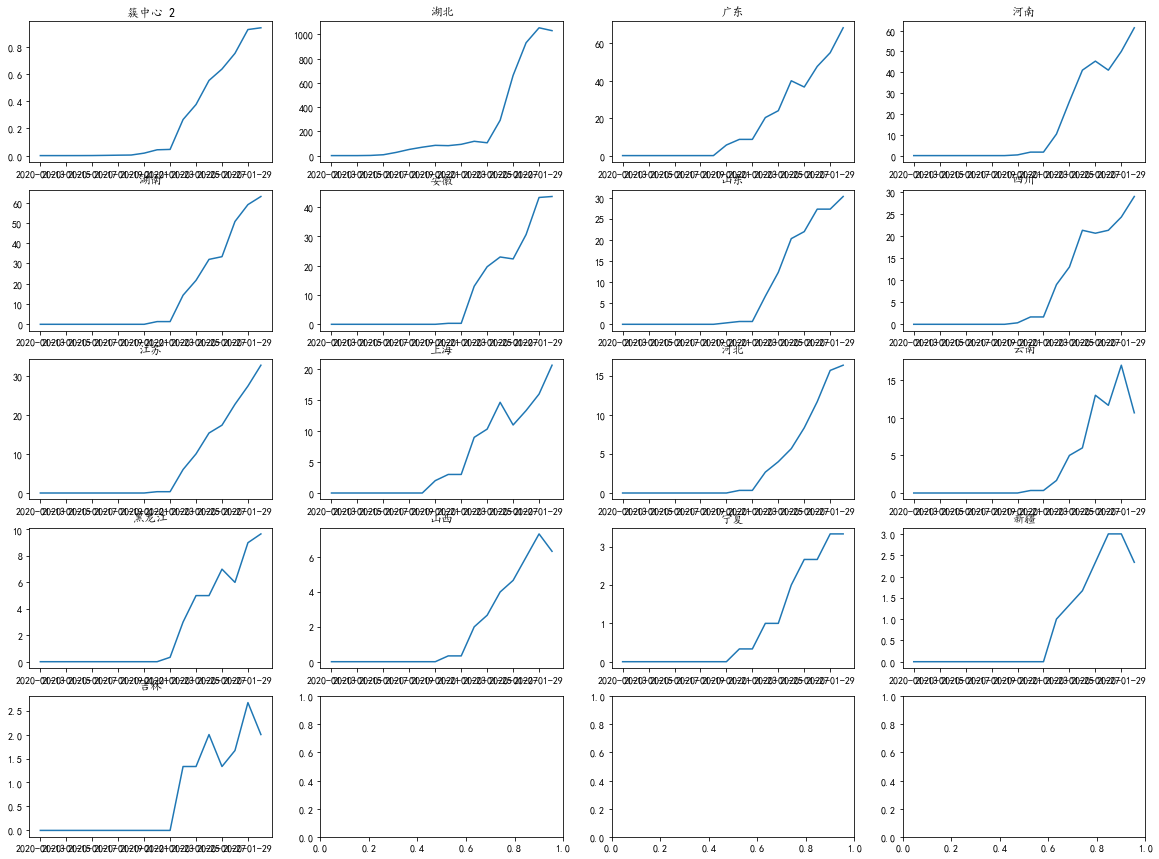

簇 id：2，新增趋势略有降低，['簇中心 3', '重庆', '北京', '福建', '广西', '陕西', '辽宁', '天津', '甘肃', '内蒙古', '贵州', '台湾', '青海']


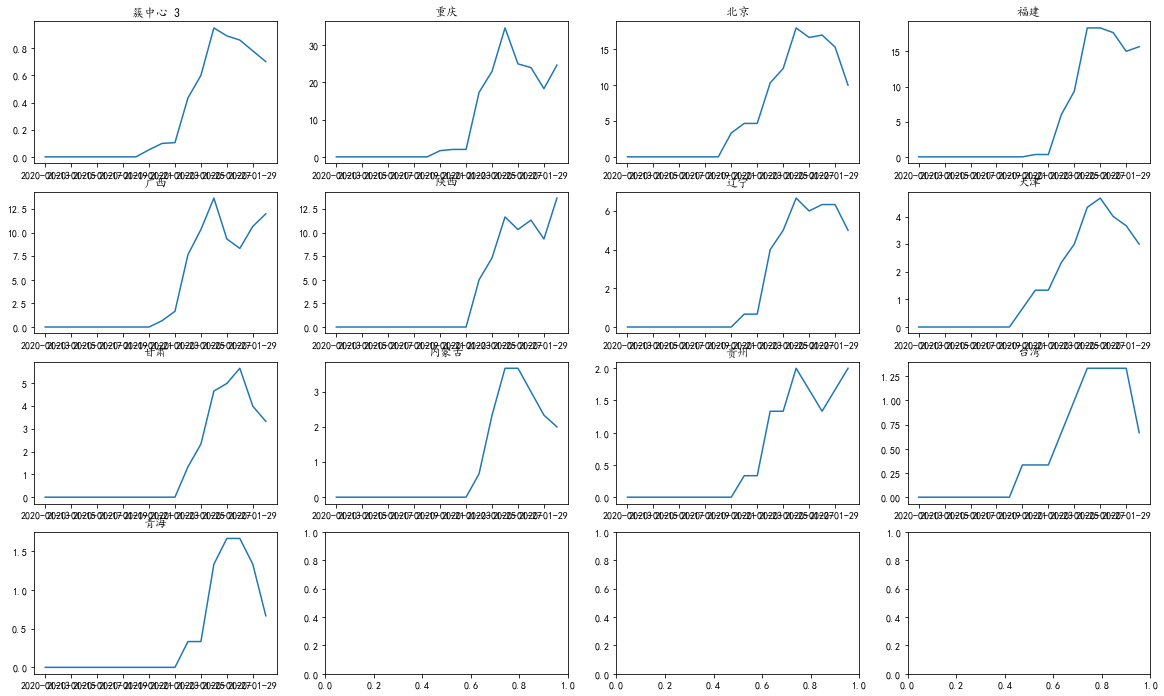

簇 id：3，新增趋势明显降低，['簇中心 4', '海南', '香港', '澳门']


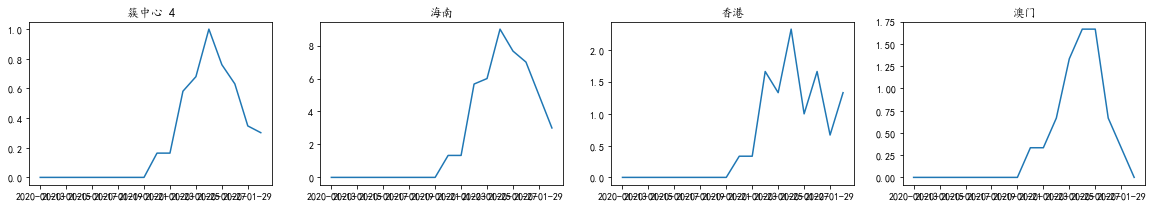

In [25]:
# 画出趋势图
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df_cluster_center = pd.DataFrame(cluster_centers.T, index=df_min_max.index, 
                                 columns=['簇中心 {}'.format(_ + 1) for _ in range(n_clusters)])
clusters_by_inc = {}
dfs = {}
for c_id, regions in enumerate(regions_by_cluster):
    clusters_by_inc[c_id] = regions
    df = df_cluster_center.iloc[:, [c_id]]
    dfs[c_id] = pd.concat([df, df_ma3[regions]], axis=1)
for c_id in range(n_clusters):
    print('=' * 100)
    print('簇 id：{}，{}，{}'.format(c_id, inc_desc[c_id], dfs[c_id].columns.tolist()))
    analyzer.subplots(dfs[c_id])

#### 2.2.3. 对上面两种分类汇总如下

In [26]:
import numpy as np
pd.set_option('display.max_rows', 50)
region_to_cum_id = {}
region_to_inc_id = {}
region_to_cum_desc = {}
region_to_inc_desc = {}
for region_dicts, clusters, desc in zip(
        [(region_to_cum_desc, region_to_cum_id), (region_to_inc_desc, region_to_inc_id)], 
        [clusters_by_cum, clusters_by_inc],
        [cum_desc, inc_desc]):
    region_dict, region_to_id = region_dicts
    for cluster_id, regions in clusters.items():
        for region in regions:
            region_to_id[region] = cluster_id
            if cluster_id == -1:
                cluster_id = 0
            val = desc[cluster_id]
            region_dict[region] = '{}'.format(val)
df_clusters = pd.DataFrame([
    pd.Series(region_to_cum_id), pd.Series(region_to_cum_desc),
    pd.Series(region_to_inc_id), pd.Series(region_to_inc_desc),
]).T
df_clusters.columns = ['累计簇 id', '累计', '趋势簇 id', '趋势']
df_clusters.fillna('特多', inplace=True)
# df_clusters['累计'] = pd.Categorical(df_clusters['累计'], ordered=True, categories=cum_desc.values())
# df_clusters['趋势'] = pd.Categorical(df_clusters['趋势'], ordered=True, categories=inc_desc.values())
df_clusters = df_clusters.sort_values(by=df_clusters.columns.tolist())

# 将累计和新增趋势取平均值
arr_cum = df_clusters['累计簇 id'].values
arr_inc = df_clusters['趋势簇 id'].values
cum_max = arr_cum.max()
inc_max = arr_inc.max()
arr_cum = arr_cum * inc_max
arr_inc = arr_inc * cum_max
a = np.mean([arr_cum, arr_inc], axis=0)
d = {_: i for i, _ in enumerate(np.unique(a))}
a = [d[_] for _ in a]
s = pd.Series(a, index=df_clusters.index, name='累计新增簇均值')
if s.name not in df_clusters.columns:
    df_clusters = pd.concat([df_clusters, s], axis=1)
df_clusters

,累计簇 id,累计,趋势簇 id,趋势,累计新增簇均值
湖北,0,特多,1,新增趋势缓缓向上,1
浙江,1,多,0,新增趋势陡然向上,0
广东,2,中,1,新增趋势缓缓向上,3
河南,2,中,1,新增趋势缓缓向上,3
湖南,2,中,1,新增趋势缓缓向上,3
江西,3,少,0,新增趋势陡然向上,2
安徽,3,少,1,新增趋势缓缓向上,5
山东,3,少,1,新增趋势缓缓向上,5
四川,3,少,1,新增趋势缓缓向上,5
江苏,3,少,1,新增趋势缓缓向上,5


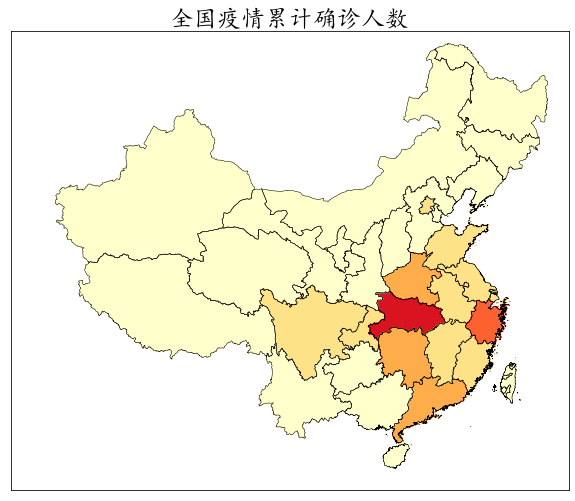

In [27]:
analyzer.plot_region_map(df_clusters['累计簇 id'], '全国疫情累计确诊人数')

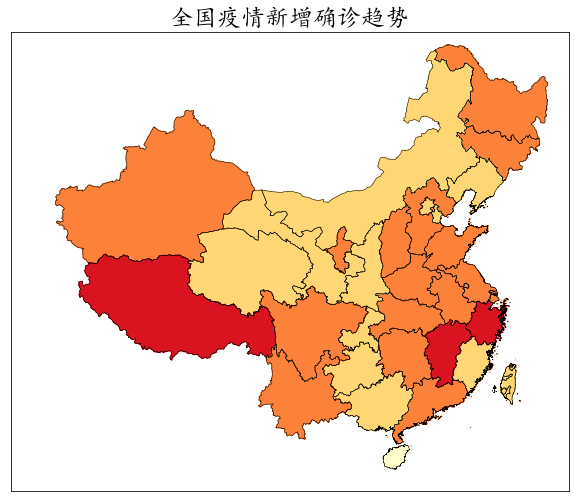

In [28]:
analyzer.plot_region_map(df_clusters['趋势簇 id'], '全国疫情新增确诊趋势')

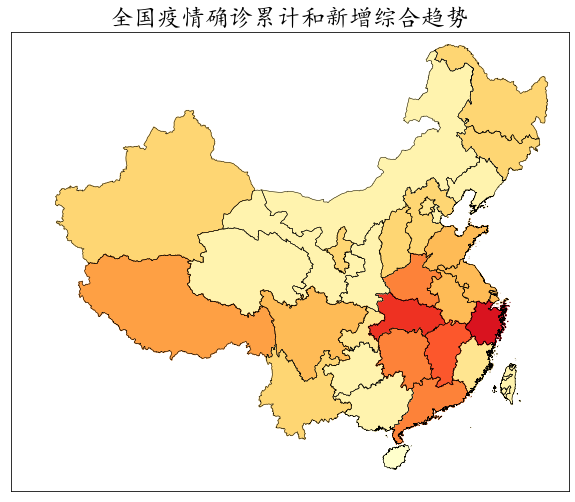

In [29]:
analyzer.plot_region_map(df_clusters['累计新增簇均值'], '全国疫情确诊累计和新增综合趋势')